In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [120]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 10]

In [142]:
no_sideways_no_cache = {
    50: "no_sideways_no_cache_50.csv",
    100: "no_sideways_no_cache_100.csv",
    250: "no_sideways_no_cache_250.csv",
    500: "no_sideways_no_cache_500.csv",
    1000: "no_sideways_no_cache_1000.csv",
    10000: "no_sideways_no_cache_10000.csv",
    100000: "100_no_sideways_no_cache_early.csv",}

no_sideways_yes_cache = {
    50: "no_sideways_cache_50.csv",
    100: "no_sideways_cache_100.csv",
    250: "no_sideways_cache_250.csv",
    500: "no_sideways_cache_500.csv",
    1000: "no_sideways_cache_1000.csv",
    10000: "no_sideways_cache_10000.csv",
    100000: "100_no_sideways_cache_early.csv",}

sideways_no_cache = {
    100000: "100_sideways_no_cache_100000.csv",
    10000: "yes_sideways_no_cache_r10000.csv",
    2500: "yes_sideways_no_cache_10000.csv",
    1000: "yes_sideways_no_cache_1000.csv",
    500: "yes_sideways_no_cache_500.csv",
    250: "yes_sideways_no_cache_250.csv",
    100: "yes_sideways_no_cache_100.csv",
    50: "yes_sideways_no_cache_50.csv",
}

sideways_yes_cache = {
    100000: "100_sideways_cache_100000.csv",
    10000: "yes_sideways_cache_r10000.csv",
    2500: "yes_sideways_cache_10000.csv",
    1000: "yes_sideways_cache_1000.csv",
    500: "yes_sideways_cache_500.csv",
    250: "yes_sideways_cache_250.csv",
    100: "yes_sideways_cache_100.csv",
    50: "yes_sideways_cache_50.csv"
}

In [113]:
def read_file(filename:str)->pd.DataFrame:
    df = pd.read_csv(filename)
    return df

In [114]:
df = read_file("no_sideways_no_cache_10000.csv")

In [115]:
df

RunNo  Restart  Cost        Time  InitialSolutionGenerationTime  \
0       0      293     0   79.671875                       0.015625   
1       1      107     0   36.453125                       0.031250   
2       2      548     0  158.859375                       0.078125   
3       3      418     0  118.359375                       0.046875   
4       4        2     0    0.578125                       0.000000   
..    ...      ...   ...         ...                            ...   
95     95      554     0  101.156250                       0.062500   
96     96      250     0   45.718750                       0.000000   
97     97      853     0  154.812500                       0.031250   
98     98       20     0    4.171875                       0.000000   
99     99      231     0   41.609375                       0.015625   

    Iterations  HeuristicCalls  HeuristicQueenCalls  \
0        19784           39568              2116888   
1         7115           14230               761305   
2        34975           69950              3742325   
3        27666           55332              2960262   
4          126             252                13482   
..         ...             ...                  ...   
95       35540           71080              3802780   
96       16154           32308              1728478   
97       54592          109184              5841344   
98        1417            2834               151619   
99       14960           29920              1600720   

    AvgNumIterationsBeforeLocalMinima  
0                           66.385666  
1                           65.214953  
2                           62.739051  
3                           65.102871  
4                           45.500000  
..                                ...  
95                          63.063177  
96                          63.436000  
97                          62.922626  
98                          67.550000  
99                          63.601732  

[100 rows x 9 columns]

In [132]:
def get_plottable_columns(df:pd.DataFrame,\
                          x_column_name:str)->tuple:
    """
    Returns k - the number of items
    a pandas data frame with the X and y axis
    """
    k = df.shape[0]    # Number of experiments
    df = df[df['Cost'] == 0]
    df = df[[x_column_name]]
    
    # drop all other columns except the column that we're interested in that
    # measures the number of calls, or time
    df = df.sort_values(by=[x_column_name])
    df = df.reset_index()
    
    # Now add the X axis which is i/k for all i in k_prime
    k_prime = df.shape[0]
    x = np.array([i/k for i in range(k_prime)])
    x = pd.Series(x)
    df['P_Solve'] = x
    
    return k, df

In [133]:
def plot_one_file(filename:str,\
                  ax,\
                  x_column_name,
                  legend_text,
                  plot_failure_rate:bool=False,
                  multiplication_factor:int=1):
    df = read_file(filename)
    k, df = get_plottable_columns(df, x_column_name)
    y = df['P_Solve'].to_numpy()
    if plot_failure_rate:
        y = 1 - y
    x = df[x_column_name].to_numpy()
    x = x * multiplication_factor
    print(ax)
    ax.plot(x, y, label=legend_text)

In [134]:

print(ax)
plot_one_file('no_sideways_no_cache_10000.csv', ax, 'Time', '10000')
fig.legend()

def plot_entire_run(run_dict:dict,\
                   x_column_name:str,
                   plot_type:str='regular',
                   plot_failure_rate:bool=False,
                   multiplication_factor:int=1):
    fig, ax = plt.subplots(1)
    for iters, filename in run_dict.items():
        plot_one_file(filename, ax, x_column_name, f"iters={iters}",\
                      plot_failure_rate, multiplication_factor)
    fig.legend()
    xlabel = x_column_name
    if plot_type == 'loglog' or plot_type == 'semilog':
        xlabel = xlabel + " (log scale)"
        ax.set_xscale('log')
    ax.set_xlabel(xlabel)
    ylabel = "P(Solve)"
    if plot_failure_rate:
        ylabel = "P(Fail)"
    if plot_type == 'loglog':
        ylabel = ylabel + " (log scale)"
        ax.set_yscale('log')
    ax.set_ylabel(ylabel)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


In [155]:
def plot_heuristic_queen_calls(run_dict:dict,\
                   plot_type:str='regular',
                   plot_failure_rate:bool=False):
    return plot_entire_run(no_sideways_yes_cache, 'HeuristicQueenCalls',\
                plot_type=plot_type, plot_failure_rate=plot_failure_rate,\
                multiplication_factor=1431)
    
def plot_time(run_dict:dict,\
                plot_type:str='regular',
                plot_failure_rate:bool=False):
    return plot_entire_run(no_sideways_yes_cache, 'Time',\
                plot_type=plot_type, plot_failure_rate=plot_failure_rate,\
                multiplication_factor=1)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


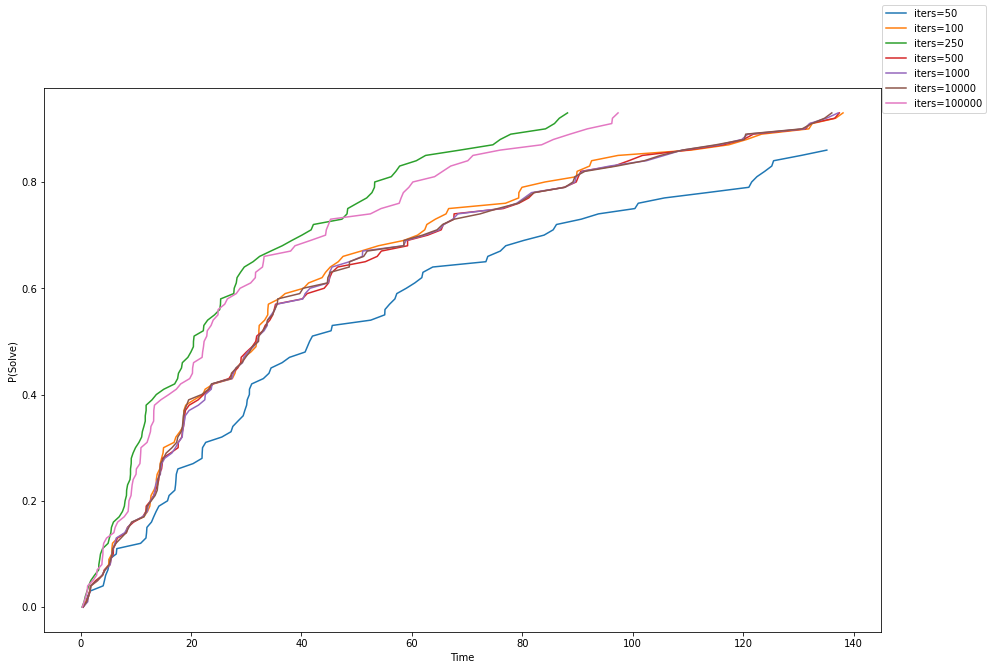

In [156]:
plot_time(no_sideways_yes_cache, \
                plot_type='regular', plot_failure_rate=False)